In [ ]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
original = pd.read_excel("Reduced Features for TAI project.xlsx")

In [3]:
original

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


In [4]:
original.isna().sum().sum() 

0

In [5]:
original = original.T.drop_duplicates().T

The dataset has no NAN values.

In [6]:
original["Patient ID"][0]

1.0

In [7]:
print(original["Patient ID"].value_counts())

34.0    342
9.0     141
36.0    138
71.0    132
42.0    129
       ... 
95.0      3
1.0       3
91.0      2
87.0      1
81.0      1
Name: Patient ID, Length: 96, dtype: int64


In [8]:
labels = original["Label"]
original_nolab = original.drop(columns=["Label"])

Keeping only 50 features to train on

In [9]:
from sklearn.feature_selection import SelectKBest, f_classif
original_bf = SelectKBest(f_classif, k=50).fit_transform(original_nolab, labels)

In [10]:
original_filt = pd.DataFrame(original_bf)

In [11]:
original_filt

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,4.906909,0.778811,...,1.409426,0.518410,0.589770,1.261683,0.531950,0.749650,2.771832,0.948558,1.228459,0.395138
1,1.0,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,4.090860,0.825847,...,1.256942,0.365623,0.523532,0.892708,0.641383,0.521884,2.642677,0.654381,0.856129,0.407353
2,1.0,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,6.259312,0.712919,...,1.092007,0.455604,0.456054,1.097503,0.480004,0.664487,2.950056,0.849529,1.060816,0.366197
3,2.0,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,3.303002,0.890553,...,1.180395,0.402303,0.500379,0.935372,0.696763,0.566843,2.481303,0.706649,0.936902,0.423163
4,2.0,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,3.061007,0.915382,...,1.219093,0.334481,0.491807,0.804745,0.709921,0.488596,2.418526,0.622858,0.932296,0.428570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96.0,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,2.020089,1.077540,...,0.338964,0.209347,0.143508,0.494224,0.791387,0.294322,1.922412,0.397908,0.694747,0.467316
3558,96.0,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,5.664997,0.720335,...,0.871868,0.326385,0.362471,0.790155,0.491678,0.470379,2.999849,0.593230,0.734119,0.358780
3559,96.0,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,4.329199,0.808586,...,0.392698,0.234246,0.162735,0.566001,0.647324,0.333218,2.606989,0.419164,0.577446,0.402013
3560,96.0,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,2.997355,0.922684,...,0.433747,0.177229,0.184015,0.443780,0.729911,0.275537,2.202109,0.372336,0.472549,0.404346


In [12]:
original_filt.rename(columns={0: "Patient ID"}, inplace=True)

In [13]:
original_filt

,Patient ID,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,4.906909,0.778811,...,1.409426,0.518410,0.589770,1.261683,0.531950,0.749650,2.771832,0.948558,1.228459,0.395138
1,1.0,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,4.090860,0.825847,...,1.256942,0.365623,0.523532,0.892708,0.641383,0.521884,2.642677,0.654381,0.856129,0.407353
2,1.0,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,6.259312,0.712919,...,1.092007,0.455604,0.456054,1.097503,0.480004,0.664487,2.950056,0.849529,1.060816,0.366197
3,2.0,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,3.303002,0.890553,...,1.180395,0.402303,0.500379,0.935372,0.696763,0.566843,2.481303,0.706649,0.936902,0.423163
4,2.0,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,3.061007,0.915382,...,1.219093,0.334481,0.491807,0.804745,0.709921,0.488596,2.418526,0.622858,0.932296,0.428570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96.0,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,2.020089,1.077540,...,0.338964,0.209347,0.143508,0.494224,0.791387,0.294322,1.922412,0.397908,0.694747,0.467316
3558,96.0,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,5.664997,0.720335,...,0.871868,0.326385,0.362471,0.790155,0.491678,0.470379,2.999849,0.593230,0.734119,0.358780
3559,96.0,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,4.329199,0.808586,...,0.392698,0.234246,0.162735,0.566001,0.647324,0.333218,2.606989,0.419164,0.577446,0.402013
3560,96.0,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,2.997355,0.922684,...,0.433747,0.177229,0.184015,0.443780,0.729911,0.275537,2.202109,0.372336,0.472549,0.404346


In [14]:
original = pd.merge(original_filt, original[["Patient ID", "Label"]], on="Patient ID")

In [15]:
original = original.drop_duplicates()

In [16]:
original = original.reset_index(inplace=False)

In [17]:
original = original.drop(columns=["index"])

Some partients have the same rows as the test part. 

We notice here that some patients have alot of data compared to other patients. For example patient number '34' has 342 rows of data whereas patient '81' has only 1 row of data. So we need to balance the data.

We can see that the data from the 96 patients is balanced (46 Negative cases to 50 Negative cases)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
neg = []
pos = []

for i in range(len(original)):
    if original["Label"][i] == 0:
        neg.append(original.iloc[i])
    else:
        pos.append(original.iloc[i])

In [20]:
dfneg = pd.DataFrame(neg)

In [21]:
dfneg[["Patient ID", "Label"]] = dfneg[["Patient ID", "Label"]].astype(int)

In [22]:
dfneg

,Patient ID,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Label
0,1,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,16.208843,4.906909,0.778811,...,0.518410,0.589770,1.261683,0.531950,0.749650,2.771832,0.948558,1.228459,0.395138,0
1,1,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,8.438487,4.090860,0.825847,...,0.365623,0.523532,0.892708,0.641383,0.521884,2.642677,0.654381,0.856129,0.407353,0
2,1,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,15.858577,6.259312,0.712919,...,0.455604,0.456054,1.097503,0.480004,0.664487,2.950056,0.849529,1.060816,0.366197,0
3,2,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,7.685345,3.303002,0.890553,...,0.402303,0.500379,0.935372,0.696763,0.566843,2.481303,0.706649,0.936902,0.423163,0
4,2,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,4.956038,3.061007,0.915382,...,0.334481,0.491807,0.804745,0.709921,0.488596,2.418526,0.622858,0.932296,0.428570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,46,6.556231,2896.170217,2142.948016,3388.937854,485.392841,5.569620,15.066560,4.675287,0.796284,...,0.467545,0.203779,1.132022,0.619613,0.667430,2.726024,0.835987,1.074476,0.400802,0
2016,46,7.887598,3628.381862,2428.119023,3596.726294,533.588966,9.443781,15.866025,5.618843,0.750122,...,0.498872,0.205404,1.204815,0.596364,0.714806,2.856460,0.898346,1.166967,0.384167,0
2017,46,0.654063,87.486486,144.351351,271.000000,8.420745,0.407397,3.869664,2.258523,1.033760,...,0.346711,0.353606,0.889960,0.687617,0.509776,2.016710,0.750022,1.177539,0.416400,0
2018,46,5.743015,3055.746041,2036.252786,3182.018573,605.873446,5.728189,13.491904,4.784400,0.776276,...,0.312564,0.418489,0.753043,0.648144,0.448187,2.759832,0.563613,0.721696,0.390031,0


In [23]:
dfpos = pd.DataFrame(pos)
dfpos[["Patient ID", "Label"]] = dfpos[["Patient ID", "Label"]].astype(int)

In [24]:
dfpos

,Patient ID,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Label
2020,47,0.533505,138.849057,90.132075,187.377358,26.008544,0.529860,2.792375,1.911394,1.106871,...,0.178471,0.235043,0.450611,0.802095,0.252604,1.968072,0.315622,0.545237,0.505456,1
2021,47,0.552986,166.500000,63.500000,185.642857,10.250000,0.521358,3.514991,2.325981,1.013955,...,0.520182,0.238415,1.265320,0.706409,0.677555,1.958905,0.878532,1.297378,0.399863,1
2022,47,0.956684,241.235294,251.742081,587.461538,47.635143,0.500438,3.573289,5.043510,0.748967,...,1.286568,0.532224,3.153112,0.417052,1.627374,2.716510,1.868166,2.823823,0.360234,1
2023,47,2.226909,631.497549,116.884804,1560.713235,163.114595,1.015119,7.475914,5.105424,0.747733,...,0.289654,0.170192,0.675268,0.604608,0.422814,2.570480,0.546666,0.780905,0.408209,1
2024,47,18.573472,3579.715899,3939.033036,4893.125788,526.151309,8.866858,36.013684,6.231274,0.701812,...,0.317155,0.421694,0.770069,0.437769,0.454571,3.126525,0.571226,0.740040,0.359678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,3.084912,2.020089,1.077540,...,0.209347,0.143508,0.494224,0.791387,0.294322,1.922412,0.397908,0.694747,0.467316,1
3558,96,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,11.341994,5.664997,0.720335,...,0.326385,0.362471,0.790155,0.491678,0.470379,2.999849,0.593230,0.734119,0.358780,1
3559,96,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,17.657257,4.329199,0.808586,...,0.234246,0.162735,0.566001,0.647324,0.333218,2.606989,0.419164,0.577446,0.402013,1
3560,96,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,6.464167,2.997355,0.922684,...,0.177229,0.184015,0.443780,0.729911,0.275537,2.202109,0.372336,0.472549,0.404346,1


In [25]:
from sklearn.model_selection import GroupShuffleSplit 

In [26]:
splitter = GroupShuffleSplit(test_size=0.33, n_splits=2, random_state = 7)
splitp = splitter.split(dfpos, groups=dfpos['Patient ID'])
train_indsp, test_indsp = next(splitp)
train_pos = dfpos.iloc[train_indsp]
test_pos = dfpos.iloc[test_indsp]

In [27]:
splitn = splitter.split(dfneg, groups=dfneg['Patient ID'])
train_indsn, test_indsn = next(splitn)
train_neg = dfneg.iloc[train_indsn]
test_neg = dfneg.iloc[test_indsn]

In [28]:
train_data = pd.concat([train_neg, train_pos])
test_data = pd.concat([test_neg, test_pos])

In [29]:
train_labels = train_data["Label"]
test_labels = test_data["Label"]

In [30]:
train_data = train_data.drop(columns=["Patient ID", "Label"])
test_data = test_data.drop(columns=["Patient ID", "Label"])

In [31]:
X_train = train_data[:]
y_train = train_labels[:]

In [32]:
X_val, X_test, y_val, y_test = train_test_split(test_data, test_labels, test_size=0.5)

In [33]:
print(f"{len(train_data)} for training")
print(f"{len(X_val)} for validating")
print(f"{len(X_test)} for testing")

2252 for training
655 for validating
655 for testing


# SVM / SVC

In [34]:
param_grid = {
    'model__kernel': ["rbf", "linear"],
    'model__gamma' : ["auto", "scale"],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', svm.SVC())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [35]:
best_params

{'model__gamma': 'auto', 'model__kernel': 'rbf'}

In [36]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svm.SVC(kernel=best_params["model__kernel"], gamma=best_params["model__gamma"], probability=True))])

In [37]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [38]:
y_pred_svm = pipe.predict(X_test)
y_pred_svm_proba = pipe.predict_proba(X_test)[:,1]

In [39]:
confusion_matrix(y_test, y_pred_svm)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))

Accuracy: 0.8061068702290076
Precision: 0.8372093023255814
Recall: 0.5925925925925926


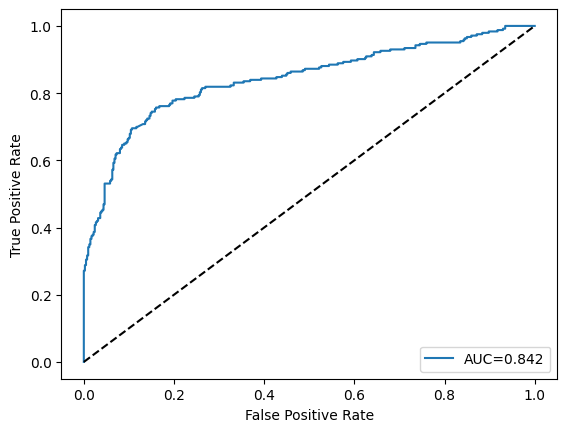

In [40]:
auc = metrics.roc_auc_score(y_test, y_pred_svm_proba)
auc = "{:.3f}".format(auc)
fprSVC, tprSVC, _ = metrics.roc_curve(y_test, y_pred_svm_proba)
plt.plot(fprSVC, tprSVC, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [41]:
print(classification_report(y_test, y_pred_svm, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       412
           1       0.84      0.59      0.69       243

    accuracy                           0.81       655
   macro avg       0.82      0.76      0.78       655
weighted avg       0.81      0.81      0.80       655



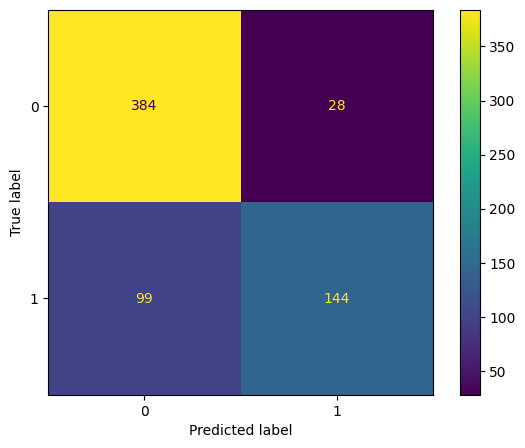

In [42]:
cm = confusion_matrix(y_test, y_pred_svm,  labels=[0,1])
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Logistic Regression

In [43]:
param_grid = {
    'model__max_iter': [500, 1000],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', LogisticRegression())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [44]:
best_params

{'model__max_iter': 500}

In [45]:
pipe = Pipeline([("preprocessor", StandardScaler()),('logReg', LogisticRegression(max_iter=best_params["model__max_iter"]))])
pipe.fit(X_train, y_train)
y_predlr = pipe.predict(X_test)
y_predlr_proba = pipe.predict_proba(X_test)[:,1]

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predlr))
print("Precision:",metrics.precision_score(y_test, y_predlr))
print("Recall:",metrics.recall_score(y_test, y_predlr))

Accuracy: 0.7694656488549618
Precision: 0.7169811320754716
Recall: 0.6255144032921811


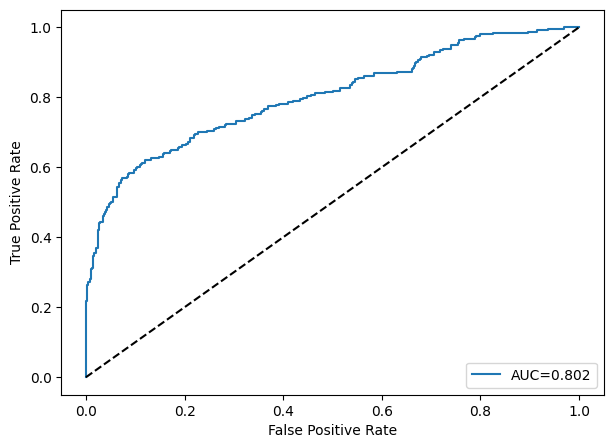

In [47]:
auc = metrics.roc_auc_score(y_test, y_predlr_proba)
auc = "{:.3f}".format(auc)
fprLR, tprLR, _ = metrics.roc_curve(y_test, y_predlr_proba)
plt.plot(fprLR, tprLR, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.rcParams["figure.figsize"] = (7,5)
plt.show()

In [48]:
print(classification_report(y_test, y_predlr, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       412
           1       0.72      0.63      0.67       243

    accuracy                           0.77       655
   macro avg       0.76      0.74      0.75       655
weighted avg       0.77      0.77      0.77       655



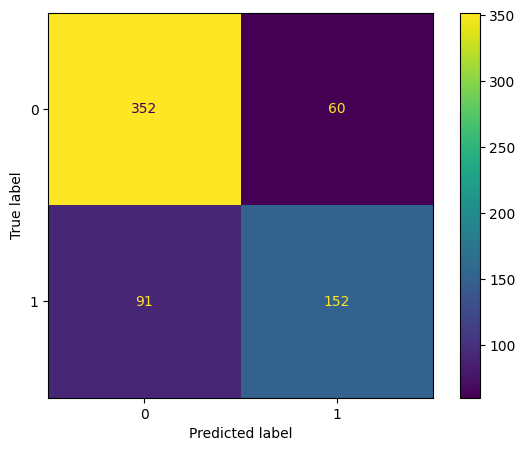

In [49]:
cm = confusion_matrix(y_test, y_predlr)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Bagging

In [50]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', BaggingClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [51]:
best_params

{'model__n_estimators': 300}

In [52]:
pipe = Pipeline([("std", StandardScaler()), ('baggC', BaggingClassifier(n_estimators=best_params["model__n_estimators"]))])
pipe.fit(X_train, y_train)
y_pred_bc = pipe.predict(X_test)
y_pred_bc_proba = pipe.predict_proba(X_test)[:,1]

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_bc))
print("Precision:",metrics.precision_score(y_test, y_pred_bc))
print("Recall:",metrics.recall_score(y_test, y_pred_bc))

Accuracy: 0.7938931297709924
Precision: 0.7621359223300971
Recall: 0.6460905349794238


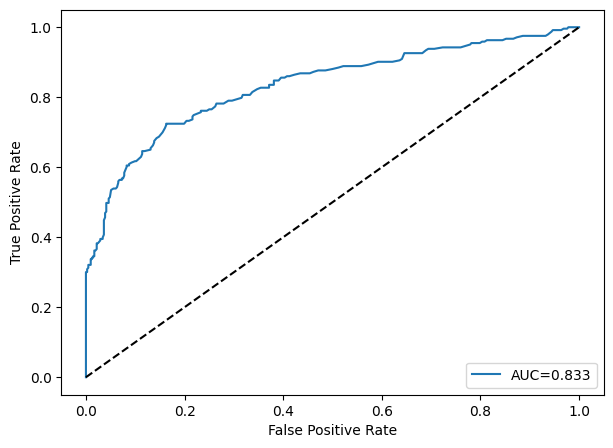

In [54]:
auc = metrics.roc_auc_score(y_test, y_pred_bc_proba)
auc = "{:.3f}".format(auc)
fprBAGGING, tprBAGGING, _ = metrics.roc_curve(y_test, y_pred_bc_proba)
plt.plot(fprBAGGING, tprBAGGING, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [55]:
print(classification_report(y_test, y_pred_bc, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       412
           1       0.76      0.65      0.70       243

    accuracy                           0.79       655
   macro avg       0.79      0.76      0.77       655
weighted avg       0.79      0.79      0.79       655



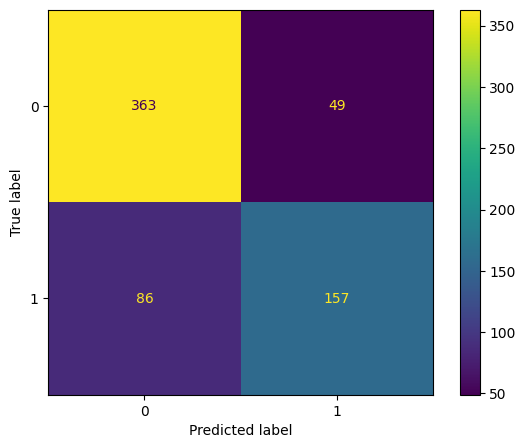

In [56]:
cm = confusion_matrix(y_test, y_pred_bc)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Adaboost

In [57]:
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', AdaBoostClassifier())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [58]:
best_params["model__n_estimators"]

50

In [59]:
pipe = Pipeline([('std', StandardScaler()), ('ada', AdaBoostClassifier(n_estimators=best_params["model__n_estimators"], random_state=42))])
pipe.fit(X_train, y_train)
y_predada = pipe.predict(X_test) 
y_predada_proba = pipe.predict_proba(X_test)[:,1]

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predada))
print("Precision:",metrics.precision_score(y_test, y_predada))
print("Recall:",metrics.recall_score(y_test, y_predada))

Accuracy: 0.7893129770992366
Precision: 0.7333333333333333
Recall: 0.6790123456790124


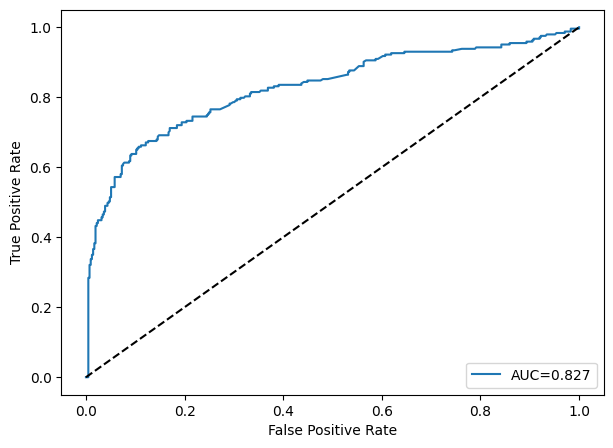

In [61]:
auc = metrics.roc_auc_score(y_test, y_predada_proba)
auc = "{:.3f}".format(auc)
fprADA, tprADA, _ = metrics.roc_curve(y_test, y_predada_proba)
plt.plot(fprADA, tprADA, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [62]:
print(classification_report(y_test, y_predada))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       412
           1       0.73      0.68      0.71       243

    accuracy                           0.79       655
   macro avg       0.78      0.77      0.77       655
weighted avg       0.79      0.79      0.79       655



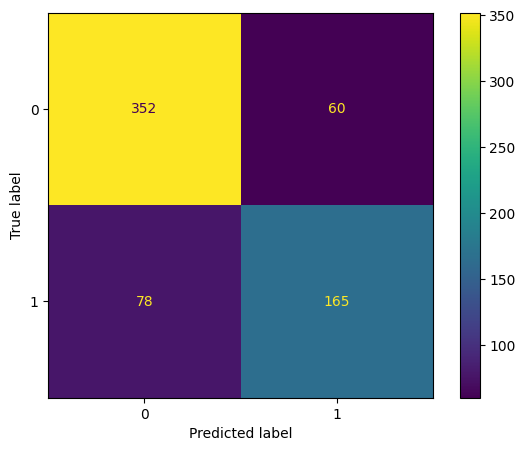

In [63]:
cm = confusion_matrix(y_test, y_predada)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Naives Bayes

In [64]:
param_grid = {
    'model__priors': [None],
    'model__var_smoothing': np.logspace(0,-9, num=100)
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', GaussianNB())  # Modeling step
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [65]:
best_params

{'model__priors': None, 'model__var_smoothing': 0.1873817422860384}

In [66]:
pipe = Pipeline([("scaler", StandardScaler()),('gnb', GaussianNB(priors=best_params["model__priors"], var_smoothing=best_params["model__var_smoothing"]))])
pipe.fit(X_train, y_train)
y_prednb = pipe.predict(X_test)
y_prednb_proba = pipe.predict_proba(X_test)[:,1]

In [67]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prednb))
print("Precision:",metrics.precision_score(y_test, y_prednb))
print("Recall:",metrics.recall_score(y_test, y_prednb))

Accuracy: 0.751145038167939
Precision: 0.6801801801801802
Recall: 0.6213991769547325


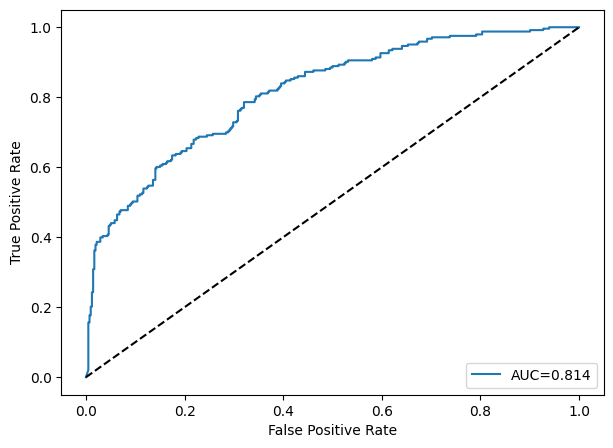

In [68]:
auc = metrics.roc_auc_score(y_test, y_prednb_proba)
auc = "{:.3f}".format(auc)
fprNB, tprNB, _ = metrics.roc_curve(y_test, y_prednb_proba)
plt.plot(fprNB, tprNB, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [69]:
print(classification_report(y_test, y_prednb, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       412
           1       0.68      0.62      0.65       243

    accuracy                           0.75       655
   macro avg       0.73      0.72      0.73       655
weighted avg       0.75      0.75      0.75       655



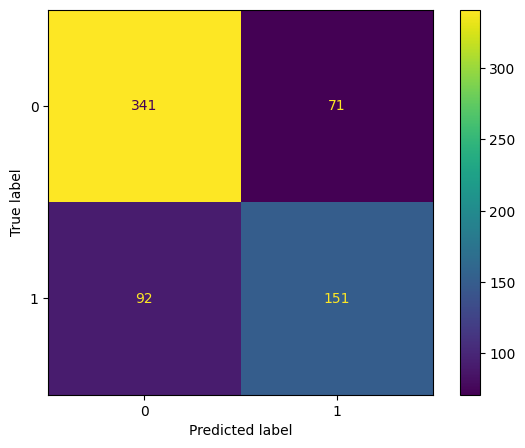

In [70]:
cm = confusion_matrix(y_test, y_prednb)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# KNN

In [71]:
arr = np.arange(1, 100, 1)

param_grid = [{
    'model__n_neighbors': arr,
    'model__leaf_size': [20, 30, 40],
    'model__weights': ['uniform', 'distance']
}]

knn = KNeighborsClassifier()

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier())  # Modeling step
])

In [72]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [73]:
print(f"The best params are :: n_neighbors = {best_params['model__n_neighbors']} , leaf_size= {best_params['model__leaf_size']}, weights= {best_params['model__weights']}")

The best params are :: n_neighbors = 55 , leaf_size= 20, weights= distance


In [74]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', KNeighborsClassifier(n_neighbors=best_params["model__n_neighbors"],  
                                     leaf_size=best_params["model__leaf_size"],
                                     weights=best_params["model__weights"] ))  # Modeling step
])

In [75]:
pipe.fit(X_train, y_train)
y_predknn = pipe.predict(X_test)
y_predknn_proba = pipe.predict_proba(X_test)[:,1]

In [76]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predknn))
print("Precision:",metrics.precision_score(y_test, y_predknn))
print("Recall:",metrics.recall_score(y_test, y_predknn))

Accuracy: 0.8274809160305343
Precision: 0.9012345679012346
Recall: 0.6008230452674898


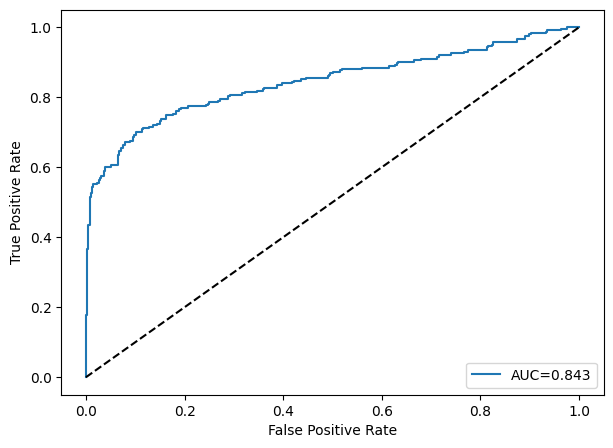

In [77]:
auc = metrics.roc_auc_score(y_test, y_predknn_proba)
auc = "{:.3f}".format(auc)
fprKNN, tprKNN, _ = metrics.roc_curve(y_test, y_predknn_proba)
plt.plot(fprKNN, tprKNN, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [78]:
print(classification_report(y_test, y_predknn, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.96      0.88       412
           1       0.90      0.60      0.72       243

    accuracy                           0.83       655
   macro avg       0.85      0.78      0.80       655
weighted avg       0.84      0.83      0.82       655



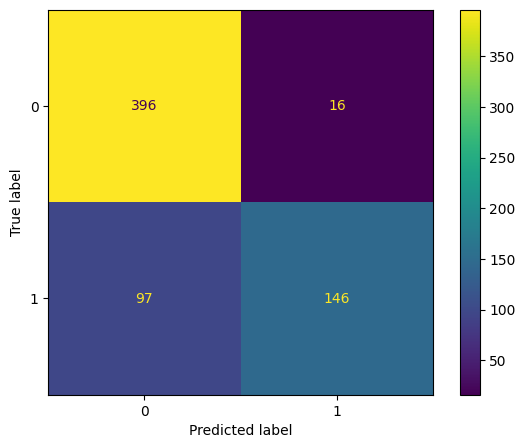

In [79]:
cm = confusion_matrix(y_test, y_predknn)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Random Forest

In [80]:
param_grid = [{
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10]
}]

rf = RandomForestClassifier()
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier())  # Modeling step
])

In [81]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [82]:
print(f"The best params are :: n_estimators = {best_params['model__n_estimators']} , max_depth = {best_params['model__max_depth']}, min_samples_split = {best_params['model__min_samples_split']}")

The best params are :: n_estimators = 100 , max_depth = 10, min_samples_split = 10


In [83]:
pipefinal = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('model', RandomForestClassifier(n_estimators=best_params["model__n_estimators"],  
                                     max_depth=best_params["model__max_depth"], 
                                     min_samples_split=best_params["model__min_samples_split"], 
                                     random_state=42))  # Modeling step
])
pipefinal.fit(X_train, y_train)
y_predrf = pipefinal.predict(X_test)
y_predrf_proba = pipefinal.predict_proba(X_test)[:,1]

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))
print("Precision:",metrics.precision_score(y_test, y_predrf))
print("Recall:",metrics.recall_score(y_test, y_predrf))

Accuracy: 0.7923664122137405
Precision: 0.8092485549132948
Recall: 0.5761316872427984


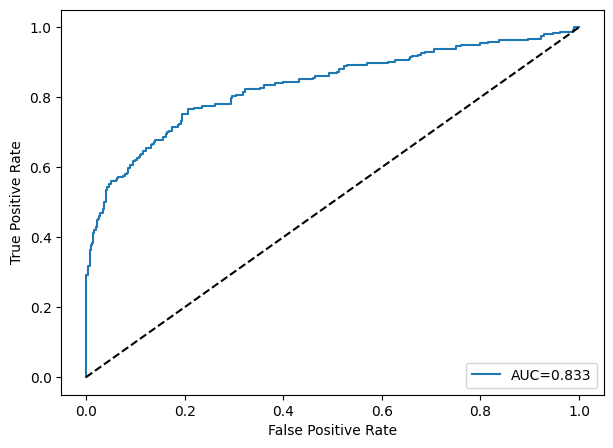

In [85]:
auc = metrics.roc_auc_score(y_test, y_predrf_proba)
auc = "{:.3f}".format(auc)
fprRF, tprRF, _ = metrics.roc_curve(y_test, y_predrf_proba)
plt.plot(fprRF, tprRF, label="AUC="+ auc)
plt.plot([0,1],[0,1], 'k--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [86]:
print(classification_report(y_test, y_predrf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       412
           1       0.81      0.58      0.67       243

    accuracy                           0.79       655
   macro avg       0.80      0.75      0.76       655
weighted avg       0.79      0.79      0.78       655



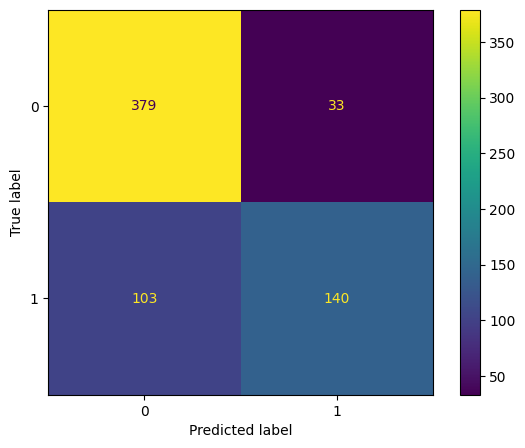

In [87]:
cm = confusion_matrix(y_test, y_predrf)
mat = ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()

# Benchmark

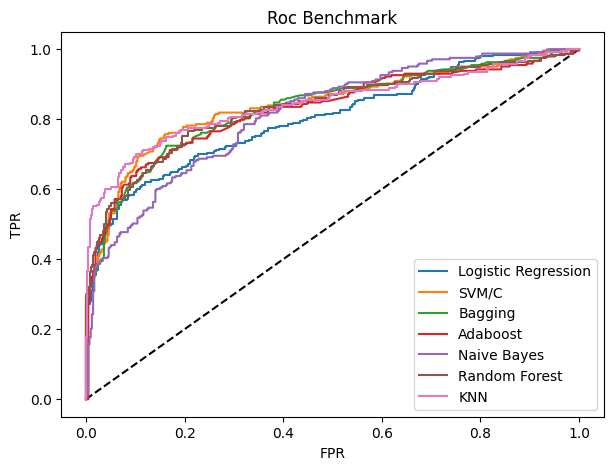

In [88]:
plt.plot([0,1],[0,1], "k--")
plt.plot(fprLR, tprLR, label= "Logistic Regression")
plt.plot(fprSVC, tprSVC, label= "SVM/C")
plt.plot(fprBAGGING, tprBAGGING, label= "Bagging")
plt.plot(fprADA, tprADA, label= "Adaboost")
plt.plot(fprNB, tprNB, label= "Naive Bayes")
plt.plot(fprRF, tprRF, label= "Random Forest")
plt.plot(fprKNN, tprKNN, label= "KNN")

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Roc Benchmark')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()